In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


In [6]:
df= pd.read_csv(r"C:\Users\DELL\Downloads\data2\data\Training\train_Demographics.csv")  
df.describe

<bound method NDFrame.describe of               id  age_yrs      ethnic_group gender_identity  weight_kg  \
0       246060.0     77.0         Caucasian               F       70.2   
1       276985.0     25.0         Caucasian               F       95.3   
2       262220.0     81.0         Caucasian               F       61.7   
3       201746.0     19.0         Caucasian               M        NaN   
4       182697.0     67.0         Caucasian               M      100.0   
...          ...      ...               ...             ...        ...   
104120  147574.0     50.0  African American               F       55.4   
104121  164758.0     50.0         Caucasian               M       90.0   
104122  197653.0     79.0         Caucasian               F       78.4   
104123  219719.0     73.0  African American               M      102.0   
104124  157942.0     35.0  African American               M      100.8   

        height_cm  body_mass_index  
0           160.0        27.421875  
1  

In [7]:
df1= pd.read_csv(r"C:\Users\DELL\Downloads\data2\data\Testing\test_Demographics.csv")  
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26032 entries, 0 to 26031
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               26032 non-null  int64  
 1   age_yrs          25023 non-null  float64
 2   ethnic_group     25706 non-null  object 
 3   gender_identity  26021 non-null  object 
 4   weight_kg        25356 non-null  float64
 5   height_cm        25591 non-null  float64
 6   body_mass_index  25127 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.4+ MB


In [8]:
df2= pd.read_csv(r"C:\Users\DELL\Downloads\data2\data\Testing\test_Laboratory_Findings.csv")  
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26032 entries, 0 to 26031
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   26032 non-null  int64  
 1   OBS1_albumin_max     11774 non-null  float64
 2   OBS1_albumin_min     11774 non-null  float64
 3   OBS2_albumin_max     2175 non-null   float64
 4   OBS2_albumin_min     2175 non-null   float64
 5   OBS1_bilirubin_max   10746 non-null  float64
 6   OBS1_bilirubin_min   10746 non-null  float64
 7   OBS2_bilirubin_max   2017 non-null   float64
 8   OBS2_bilirubin_min   2017 non-null   float64
 9   OBS1_bun_max         23267 non-null  float64
 10  OBS1_bun_min         23267 non-null  float64
 11  OBS2_bun_max         4939 non-null   float64
 12  OBS2_bun_min         4939 non-null   float64
 13  OBS1_creatinine_max  23356 non-null  float64
 14  OBS1_creatinine_min  23356 non-null  float64
 15  OBS2_creatinine_max  4998 non-null  

In [9]:
df3= pd.read_csv(r"C:\Users\DELL\Downloads\data2\data\Testing\test_Medical_History.csv")  
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26032 entries, 0 to 26031
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   id                       26032 non-null  int64
 1   hiv_aids_status          26032 non-null  int64
 2   chronic_liver_disease    26032 non-null  int64
 3   liver_function_impaired  26032 non-null  int64
 4   immune_compromise        26032 non-null  int64
 5   blood_cancer             26032 non-null  int64
 6   lymphatic_cancer         26032 non-null  int64
 7   advanced_solid_tumor     26032 non-null  int64
dtypes: int64(8)
memory usage: 1.6 MB


In [10]:
train_combined = pd.merge(df, df1, on='id')

In [11]:
train_combined = pd.merge(train_combined, df2, on='id')

In [12]:
train_combined = pd.merge(train_combined, df3, on='id')

In [13]:
  
df4 = pd.read_csv(r"C:\Users\DELL\Downloads\data2\data\Testing\test_Vital_Signs.csv")
test_combined = pd.merge(df, df1, on='id')
test_combined = pd.merge(test_combined, df2, on='id')
test_combined = pd.merge(test_combined, df3, on='id')
concat = pd.concat([df,df1,df2,df3])
test_combined

,id,age_yrs_x,ethnic_group_x,gender_identity_x,weight_kg_x,height_cm_x,body_mass_index_x,age_yrs_y,ethnic_group_y,gender_identity_y,...,OBS1_sodium_min,OBS2_sodium_max,OBS2_sodium_min,hiv_aids_status,chronic_liver_disease,liver_function_impaired,immune_compromise,blood_cancer,lymphatic_cancer,advanced_solid_tumor


In [14]:
dft= pd.read_csv(r"C:\Users\DELL\Downloads\data2\data\Training\train_Demographics.csv")
dft1= pd.read_csv(r"C:\Users\DELL\Downloads\data2\data\Training\train_Laboratory_Findings.csv")  
dft2= pd.read_csv(r"C:\Users\DELL\Downloads\data2\data\Training\train_Medical_History.csv")  
dft3= pd.read_csv(r"C:\Users\DELL\Downloads\data2\data\Training\train_Target_data.csv")  
dft4 = pd.read_csv(r"C:\Users\DELL\Downloads\data2\data\Training\train_Vital_Signs.csv")
train_combined = pd.merge(dft, dft1, on='id')
train_combined = pd.merge(train_combined, dft2, on='id')
train_combined = pd.merge(train_combined, dft3, on='id')
train_combined = pd.merge(train_combined, dft4, on='id')
train_combined['ethnic_group'] = train_combined['ethnic_group'].astype('category').cat.codes
train_combined['gender_identity'] = train_combined['gender_identity'].astype('category').cat.codes
train_combined['liver_function_impaired'] = train_combined['liver_function_impaired'].replace({'true': 1})

train_combined.fillna(train_combined.median(), inplace=True)




In [15]:
train_combined

,id,age_yrs,ethnic_group,gender_identity,weight_kg,height_cm,body_mass_index,OBS1_albumin_max,OBS1_albumin_min,OBS2_albumin_max,...,OBS2_sysb_max,OBS2_sysb_min,OBS1_diasb_max,OBS1_diasb_min,OBS2_diasb_max,OBS2_diasb_min,OBS1_temper_max,OBS1_temper_min,OBS2_temper_max,OBS2_temper_min
0,246060.0,77.0,3,0,70.2,160.0,27.421875,1.6,1.6,3.1,...,95.0,71.0,95.0,31.0,61.0,48.0,36.3,35.1,36.3,36.3
1,276985.0,25.0,3,0,95.3,172.7,31.952749,3.0,2.9,3.1,...,148.0,124.0,88.0,48.0,88.0,58.0,37.0,36.7,36.7,36.7
2,262220.0,81.0,3,0,61.7,165.1,22.635548,3.0,2.9,3.1,...,136.0,106.0,48.0,42.0,62.0,44.0,38.0,34.8,35.6,34.8
3,201746.0,19.0,3,1,80.0,188.0,27.552096,3.0,2.9,3.1,...,130.0,120.0,99.0,57.0,99.0,68.0,37.2,36.7,36.7,36.7
4,182697.0,67.0,3,1,100.0,190.5,27.555611,3.0,2.9,3.1,...,143.0,143.0,100.0,61.0,89.0,89.0,36.8,36.6,36.7,36.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104120,147574.0,50.0,1,0,55.4,165.1,20.324301,2.8,2.8,2.8,...,113.0,111.0,72.0,52.0,62.0,55.0,37.8,34.9,36.7,36.7
104121,164758.0,50.0,3,1,90.0,175.3,29.287256,3.0,2.9,3.1,...,161.0,134.0,102.0,82.0,102.0,82.0,36.6,36.2,36.6,36.6
104122,197653.0,79.0,3,0,78.4,162.6,29.653433,3.5,3.5,3.1,...,147.0,139.0,97.0,63.0,83.0,81.0,37.4,36.4,37.4,37.4
104123,219719.0,73.0,1,1,102.0,177.8,32.265371,3.3,3.3,3.3,...,134.0,134.0,82.0,60.0,70.0,70.0,35.1,32.5,34.2,33.7


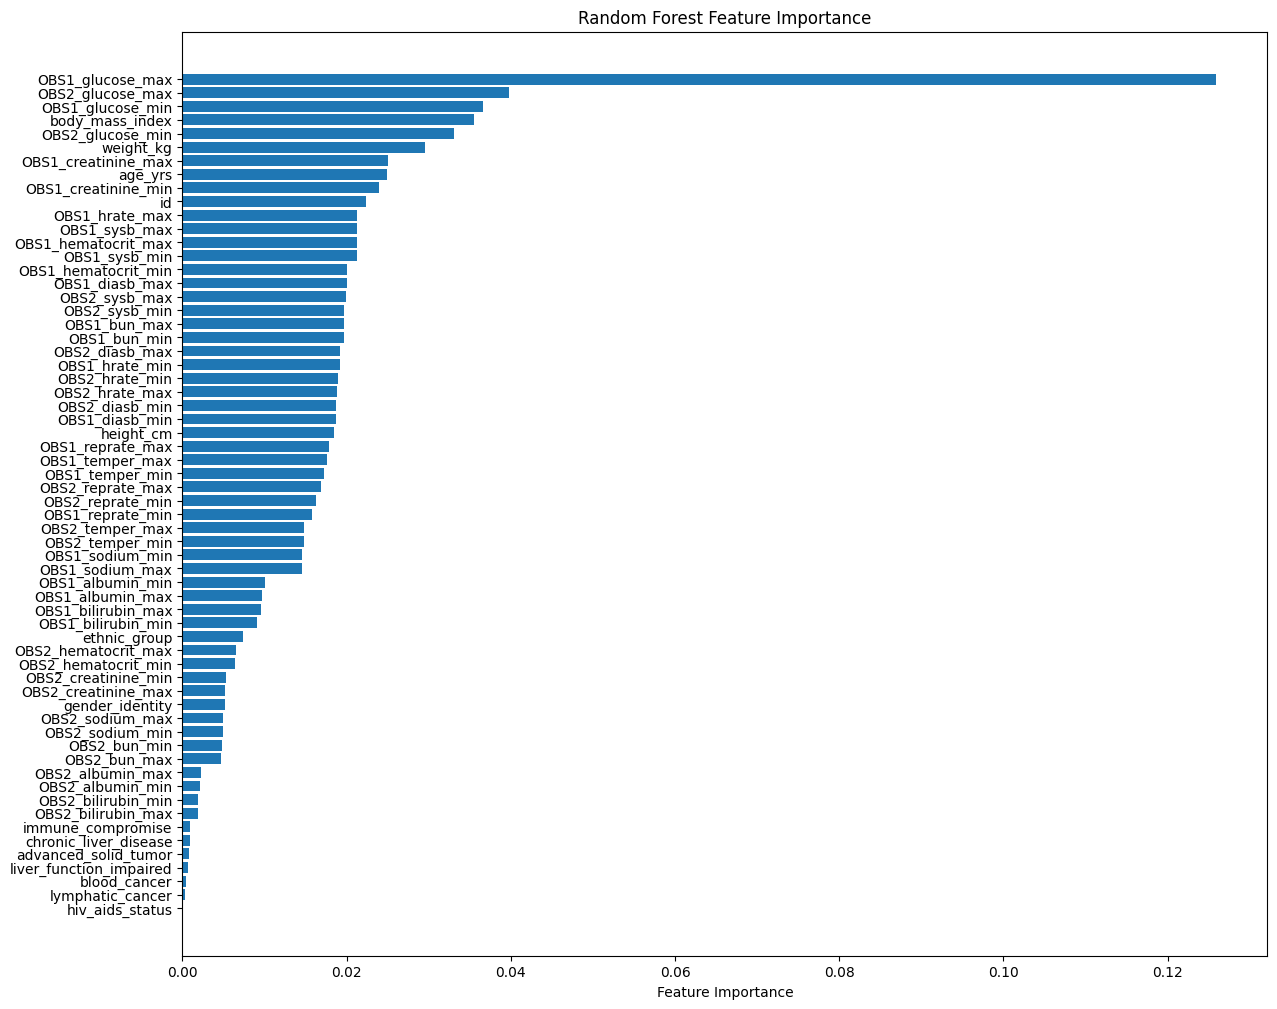

In [16]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


# Separate features (X) and target variable (y)
X = train_combined.drop('fasting_ability', axis=1)
y = train_combined['fasting_ability']



# Train a RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Sort features by importance
sorted_idx = feature_importances.argsort()

# Plotting feature importances
plt.figure(figsize=(14, 12))
plt.barh(range(len(feature_importances)), feature_importances[sorted_idx])
plt.yticks(range(len(feature_importances)), X.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



numerical_columns = train_combined.select_dtypes(include=['int64', 'float64'])
categorical_columns = train_combined.select_dtypes(exclude=['int64', 'float64'])

# Assume 'can_fast' is the target variable
# Specify the columns to be dropped
columns_to_drop = ['body_mass_index', 'OBS2_creatinine_min', 'OBS1_glucose_min', 'OBS2_glucose_min','OBS1_bun_min']

# Create the feature matrix X by dropping the specified columns
X = train_combined.drop(columns='fasting_ability', axis=1)

y = train_combined['fasting_ability']

# Perform data preprocessing (e.g., handle categorical variables, missing values)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.6f}")

print("Classification Report:\n", classification_rep)


Accuracy: 0.814454
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.34      0.44      4495
           1       0.84      0.94      0.89     16330

    accuracy                           0.81     20825
   macro avg       0.73      0.64      0.67     20825
weighted avg       0.79      0.81      0.79     20825



In [18]:
X.head()

,id,age_yrs,ethnic_group,gender_identity,weight_kg,height_cm,body_mass_index,OBS1_albumin_max,OBS1_albumin_min,OBS2_albumin_max,...,OBS2_sysb_max,OBS2_sysb_min,OBS1_diasb_max,OBS1_diasb_min,OBS2_diasb_max,OBS2_diasb_min,OBS1_temper_max,OBS1_temper_min,OBS2_temper_max,OBS2_temper_min
0,246060.0,77.0,3,0,70.2,160.0,27.421875,1.6,1.6,3.1,...,95.0,71.0,95.0,31.0,61.0,48.0,36.3,35.1,36.3,36.3
1,276985.0,25.0,3,0,95.3,172.7,31.952749,3.0,2.9,3.1,...,148.0,124.0,88.0,48.0,88.0,58.0,37.0,36.7,36.7,36.7
2,262220.0,81.0,3,0,61.7,165.1,22.635548,3.0,2.9,3.1,...,136.0,106.0,48.0,42.0,62.0,44.0,38.0,34.8,35.6,34.8
3,201746.0,19.0,3,1,80.0,188.0,27.552096,3.0,2.9,3.1,...,130.0,120.0,99.0,57.0,99.0,68.0,37.2,36.7,36.7,36.7
4,182697.0,67.0,3,1,100.0,190.5,27.555611,3.0,2.9,3.1,...,143.0,143.0,100.0,61.0,89.0,89.0,36.8,36.6,36.7,36.7


In [19]:
categorical_columns


,ethnic_group,gender_identity,liver_function_impaired
0,3,0,0
1,3,0,0
2,3,0,0
3,3,1,0
4,3,1,0
...,...,...,...
104120,1,0,0
104121,3,1,0
104122,3,0,0
104123,1,1,0


In [20]:

numerical_columns

,id,age_yrs,weight_kg,height_cm,body_mass_index,OBS1_albumin_max,OBS1_albumin_min,OBS2_albumin_max,OBS2_albumin_min,OBS1_bilirubin_max,...,OBS2_sysb_max,OBS2_sysb_min,OBS1_diasb_max,OBS1_diasb_min,OBS2_diasb_max,OBS2_diasb_min,OBS1_temper_max,OBS1_temper_min,OBS2_temper_max,OBS2_temper_min
0,246060.0,77.0,70.2,160.0,27.421875,1.6,1.6,3.1,3.0,0.5,...,95.0,71.0,95.0,31.0,61.0,48.0,36.3,35.1,36.3,36.3
1,276985.0,25.0,95.3,172.7,31.952749,3.0,2.9,3.1,3.0,0.7,...,148.0,124.0,88.0,48.0,88.0,58.0,37.0,36.7,36.7,36.7
2,262220.0,81.0,61.7,165.1,22.635548,3.0,2.9,3.1,3.0,0.7,...,136.0,106.0,48.0,42.0,62.0,44.0,38.0,34.8,35.6,34.8
3,201746.0,19.0,80.0,188.0,27.552096,3.0,2.9,3.1,3.0,0.7,...,130.0,120.0,99.0,57.0,99.0,68.0,37.2,36.7,36.7,36.7
4,182697.0,67.0,100.0,190.5,27.555611,3.0,2.9,3.1,3.0,0.7,...,143.0,143.0,100.0,61.0,89.0,89.0,36.8,36.6,36.7,36.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104120,147574.0,50.0,55.4,165.1,20.324301,2.8,2.8,2.8,2.8,0.2,...,113.0,111.0,72.0,52.0,62.0,55.0,37.8,34.9,36.7,36.7
104121,164758.0,50.0,90.0,175.3,29.287256,3.0,2.9,3.1,3.0,0.7,...,161.0,134.0,102.0,82.0,102.0,82.0,36.6,36.2,36.6,36.6
104122,197653.0,79.0,78.4,162.6,29.653433,3.5,3.5,3.1,3.0,0.7,...,147.0,139.0,97.0,63.0,83.0,81.0,37.4,36.4,37.4,37.4
104123,219719.0,73.0,102.0,177.8,32.265371,3.3,3.3,3.3,3.3,0.5,...,134.0,134.0,82.0,60.0,70.0,70.0,35.1,32.5,34.2,33.7


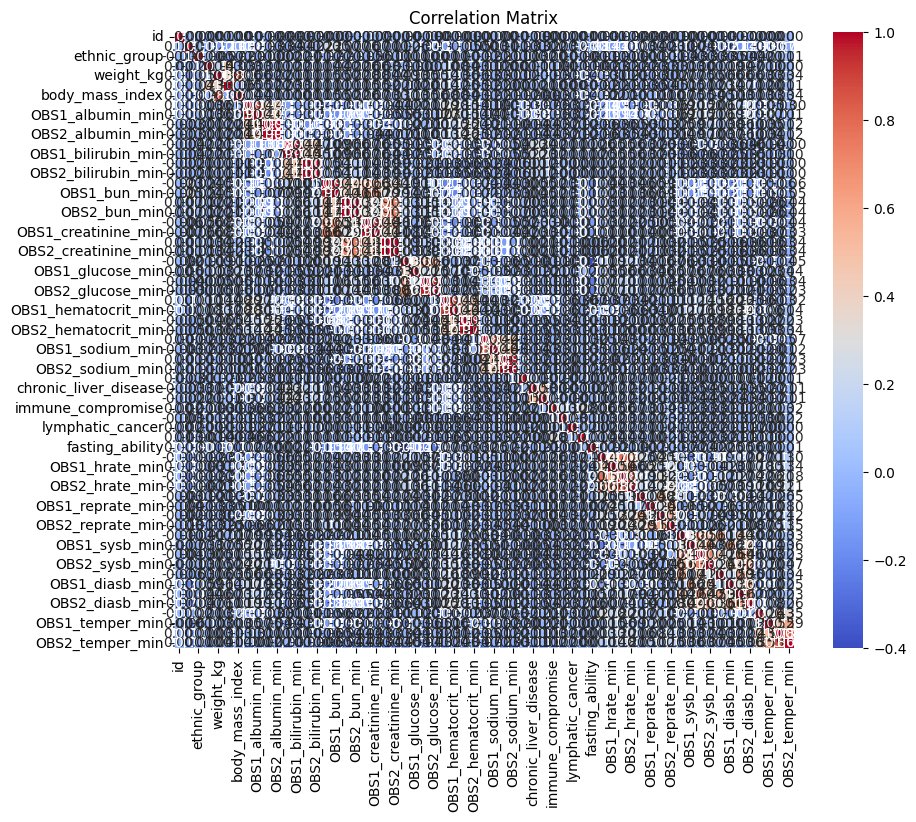

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification



# Calculate the correlation matrix
correlation_matrix = train_combined.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load testing datasets  

df = pd.read_csv(r"C:\Users\DELL\Downloads\data2\data\Testing\test_Demographics.csv")
df1 = pd.read_csv(r"C:\Users\DELL\Downloads\data2\data\Testing\test_Laboratory_Findings.csv")
df2 = pd.read_csv(r"C:\Users\DELL\Downloads\data2\data\Testing\test_Medical_History.csv")
df3 = pd.read_csv(r"C:\Users\DELL\Downloads\data2\data\Testing\test_Vital_Signs.csv")
df4 = pd.read_csv(r"C:\Users\DELL\Downloads\data2\data\Testing\submission.csv")

# Merge testing datasets on 'id'
test_combined = pd.merge(df, df1, on='id')
test_combined = pd.merge(test_combined, df2, on='id')
test_combined = pd.merge(test_combined, df3, on='id')

# Convert categorical columns to numerical codes
test_combined['ethnic_group'] = test_combined['ethnic_group'].astype('category').cat.codes
test_combined['gender_identity'] = test_combined['gender_identity'].astype('category').cat.codes
test_combined['liver_function_impaired'] = test_combined['liver_function_impaired'].replace({'true': 1})

# Fill missing values with the median
test_combined.fillna(test_combined.median(), inplace=True)


numerical_column= test_combined.select_dtypes(include=['int64', 'float64'])
categorical_column = test_combined.select_dtypes(exclude=['int64', 'float64'])

# Assume 'can_fast' is the target variable
# Specify the columns to be dropped

# Create the feature matrix X by dropping the specified columns
X_test = test_combined.values


y_preds = rf_model.predict(X_test)

# Evaluate the model


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [27]:
y_preds

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [30]:
dff= pd.read_csv(r"C:\Users\DELL\Downloads\data2\data\Testing\submission.csv")  
dff['fasting_ability'] = y_preds
dff.to_csv('C:\\Users\\DELL\\Downloads\\submission5.csv',index=False)

In [31]:
y_preds

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [34]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Load training datasets
df_train = pd.read_csv(r"C:\Users\DELL\Downloads\data2\data\Training\train_Demographics.csv")
df1_train = pd.read_csv(r"C:\Users\DELL\Downloads\data2\data\Training\train_Laboratory_Findings.csv")
df2_train = pd.read_csv(r"C:\Users\DELL\Downloads\data2\data\Training\train_Medical_History.csv")
df3_train = pd.read_csv(r"C:\Users\DELL\Downloads\data2\data\Training\train_Vital_Signs.csv")
df4_train = pd.read_csv(r"C:\Users\DELL\Downloads\data2\data\Training\train_Target_data.csv")

# Merge training datasets on 'id'
train_combined = pd.merge(df_train, df1_train, on='id')
train_combined = pd.merge(train_combined, df2_train, on='id')
train_combined = pd.merge(train_combined, df3_train, on='id')
train_combined = pd.merge(train_combined, df4_train, on='id')

# Convert categorical columns to numerical codes
train_combined['ethnic_group'] = train_combined['ethnic_group'].astype('category').cat.codes
train_combined['gender_identity'] = train_combined['gender_identity'].astype('category').cat.codes
train_combined['liver_function_impaired'] = train_combined['liver_function_impaired'].replace({'true': 1})

# Fill missing values with the median
train_combined.fillna(train_combined.median(), inplace=True)

# Specify the columns to be dropped
columns_to_drop = ['body_mass_index', 'OBS2_creatinine_min', 'OBS1_glucose_min', 'OBS2_glucose_min', 'OBS1_bun_min']

# Create the feature matrix X by dropping the specified columns
X_train = train_combined.drop(columns=columns_to_drop + ['fasting_ability'], axis=1)

# Assume 'can_fast' is the target variable
y_train = train_combined['fasting_ability']

# Create and train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)  # Fit the model with training data

# Load testing datasets
df_test = pd.read_csv(r"C:\Users\DELL\Downloads\data2\data\Testing\test_Demographics.csv")
df1_test = pd.read_csv(r"C:\Users\DELL\Downloads\data2\data\Testing\test_Laboratory_Findings.csv")
df2_test = pd.read_csv(r"C:\Users\DELL\Downloads\data2\data\Testing\test_Medical_History.csv")
df3_test = pd.read_csv(r"C:\Users\DELL\Downloads\data2\data\Testing\test_Vital_Signs.csv")
df4_test = pd.read_csv(r"C:\Users\DELL\Downloads\data2\data\Testing\submission.csv")

# Merge testing datasets on 'id'
test_combined = pd.merge(df_test, df1_test, on='id')
test_combined = pd.merge(test_combined, df2_test, on='id')
test_combined = pd.merge(test_combined, df3_test, on='id')
test_combined = pd.merge(test_combined, df4_test, on='id')

# Convert categorical columns to numerical codes
test_combined['ethnic_group'] = test_combined['ethnic_group'].astype('category').cat.codes
test_combined['gender_identity'] = test_combined['gender_identity'].astype('category').cat.codes
test_combined['liver_function_impaired'] = test_combined['liver_function_impaired'].replace({'true': 1})

# Fill missing values with the median
test_combined.fillna(test_combined.median(), inplace=True)

# Specify the columns to be dropped
columns_to_drop_test = ['body_mass_index', 'OBS2_creatinine_min', 'OBS1_glucose_min', 'OBS2_glucose_min', 'OBS1_bun_min']

# Create the feature matrix X by dropping the specified columns
X_test = test_combined.drop(columns=columns_to_drop_test + ['fasting_ability'], axis=1)

# Make predictions on the test set with probabilities
y_probs = rf_model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class

# Display the predicted probabilities
print("Predicted Probabilities:\n", y_probs)

# Save the predicted probabilities to a file (e.g., submission.csv)
submission_df = pd.DataFrame({'id': test_combined['id'], 'fasting_ability_prob': y_probs})
submission_df.to_csv('submission.csv', index=False)

# Note: Ensure to submit the 'submission.csv' file containing predicted probabilities for evaluation.


Predicted Probabilities:
 [0.81 0.48 0.96 ... 0.9  0.72 0.8 ]


In [35]:
y_probs

array([0.81, 0.48, 0.96, ..., 0.9 , 0.72, 0.8 ])

In [36]:
dff= pd.read_csv(r"C:\Users\DELL\Downloads\data2\data\Testing\submission.csv")  
dff['fasting_ability'] = y_preds
dff.to_csv('C:\\Users\\DELL\\Downloads\\submission6.csv',index=False)

In [ ]:
dff= pd.read_csv(r"C:\Users\DELL\Downloads\data2\data\Testing\submission.csv")  
dff['fasting_ability'] = y_probs
dff.to_csv('C:\\Users\\DELL\\Downloads\\submission6.csv',index=False)